In [65]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib
import scipy.optimize as opt

In [72]:
data = scio.loadmat("ex3data1.mat")
X = data['X']
y = data['y']

In [41]:
def displayData(X, example_width):
    m, n = X.shape
    example_width = int(example_width)
    example_height = int(n / example_width)
    display_rows = int(np.floor(math.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))
    h, display_arr = plt.subplots(nrows = display_rows, ncols = display_cols, sharex = True, sharey = True, figsize = (8, 8))
    plt.subplots_adjust(wspace=0.05,hspace=0.05)
    for i in range(display_rows):
        for j in range(display_cols):
            display_arr[i, j].matshow(np.array(X[i * display_cols + j]).reshape(example_width, example_height).T, cmap = matplotlib.cm.gray)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    return h, display_arr

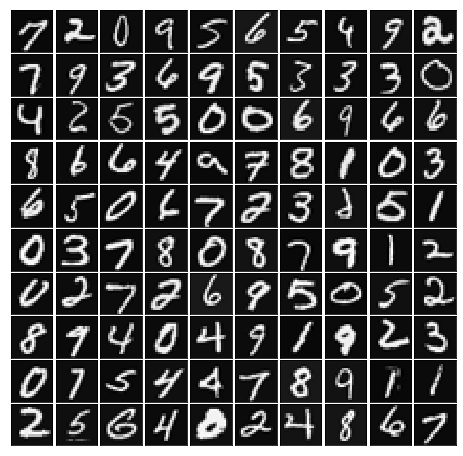

In [42]:
random_indices = np.random.choice(np.arange(X.shape[0]), 100)
sel = X[random_indices, :]
h, display_arr = displayData(sel, 20)

In [43]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [83]:
def lrCostFunction(theta, X, y, lamda):
    m, n = X.shape
    theta = theta.reshape(n, 1)
    s1 = np.dot(y.T, np.log(sigmoid(np.dot(X, theta))))
    s2 = np.dot((1 - y).T, np.log(1 - sigmoid(np.dot(X, theta))))
    s3 = np.dot(theta.T, theta) - theta[0,0] * theta[0,0]
    cost = -1 / m * (s1 + s2) + lamda / 2 / m * s3
    
    s4 = np.dot(X.T, sigmoid(np.dot(X, theta)) - y)
    s5 = theta
    s5[0, 0] = 0
    gradient = 1 / m * s4 + lamda / m * s5
    return cost, gradient

In [94]:
X_t = np.arange(1, 16).reshape(3, 5) / 10
X_t = np.column_stack((np.ones((5, 1)), X_t.T))
y_t = np.array([1, 0, 1, 0, 1]).reshape(5, 1) >= 0.5
theta_t = np.array([-2, -1, 1, 2]).reshape(4, 1)
lamda_t = 3
J, grad = lrCostFunction(theta_t, X_t, y_t, lamda_t)
print("J = %s"%J)
print("grad = %s"%grad)
#costFunction(theta_t, X_t, y_t, lamda_t)
#gradient(theta_t, X_t, y_t, lamda_t)

J = [[2.5348194]]
grad = [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]


In [89]:
def costFunction(theta, X, y, lamda):
    m, n = X.shape
    theta = theta.reshape(n, 1)
    s1 = np.dot(y.T, np.log(sigmoid(np.dot(X, theta))))
    s2 = np.dot((1 - y).T, np.log(1 - sigmoid(np.dot(X, theta))))
    s3 = np.dot(theta.T, theta) - theta[0,0] * theta[0,0]
    cost = -1 / m * (s1 + s2) + lamda / 2 / m * s3
    return cost

In [211]:
def gradient(theta, X, y, lamda):
    m, n = X.shape
    theta = theta.reshape(n,1)
    s4 = np.dot(X.T, sigmoid(np.dot(X,theta)) - y)
    s5 = theta
    s5[0,0] = 0
    gradient = 1 / m * s4 + lamda / m * s5
    return np.array(gradient).ravel()

In [207]:
def oneVsAll(X, y, num_labels, Lambda):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.column_stack((np.ones((m, 1)), X))
    for i in range(num_labels):
        theta = np.zeros(n + 1)
        result = opt.fmin_cg(f = costFunction, x0 = theta, fprime = gradient, args = (X, y == i + 1, Lambda), maxiter = 50, disp=False)
        all_theta[i, :] = result
    return all_theta

In [213]:
Lambda = 0.1
num_labels = 10
all_theta = oneVsAll(X, y, num_labels, Lambda)
print(all_theta.shape)

(10, 401)


In [218]:
def predictOneVsAll(all_theta, X):
    m, n = X.shape
    X = np.column_stack((np.ones((m, 1)), X))
    tmp = sigmoid(np.dot(X, all_theta.T))
    p = np.argmax(tmp, axis = 1) + 1
    return p.reshape(m, 1)

In [224]:
p = predictOneVsAll(all_theta, X)
print("Accuracy = %s%%"%(np.mean(p == y) * 100))

Accuracy = 95.1%
